# Seattle and Boston Airbnb Data #

## CRISP-DM Framework ##

**SECTION 1: Business Understanding**

We want to determine the rental price of Airbnb homes at certain time frames and cities such as seattle and boston. Comparing the rental rates of Airbnb homes in these two cities can be useful in predicting the rental price.  .

The business problems we are trying to uncover are:

**QUESTION 1: What features can strongly affect Airbnb rental price?**

**QUESTION 2: What features distinguishes Airbnb homes in Seattle from those in Boston?**

**QUESTION 3: How to differentiate the reviews based on price?**

#### Import Libraries ####

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR



#### Import Data ####

In [2]:
# Load in the Seattle and the Boston listings data
listings_Seattle = pd.read_csv("listings_Seattle.csv")
listings_Boston = pd.read_csv("listings_Boston.csv")

**SECTION 2: Data Understanding**

Seattle dataset consists of 6376 fields while Boston's has 3864 fields. Both has 18 attributes each. Datasets investigation was carried out before preprocessing.

#### Access and Explore ####

In [3]:
# Return the shape of Seattle dataset
num_rows_seattle = listings_Seattle.shape[0]
num_columns_seattle = listings_Seattle.shape[1]
print('There are {} fields and {} attributes for Seattle listings.'.format(num_rows_seattle,num_columns_seattle))

There are 6376 fields and 18 attributes for Seattle listings.


In [4]:
# Return the shape of Boston dataset
num_rows_boston = listings_Boston.shape[0]
num_columns_boston = listings_Boston.shape[1]
print('There are {} fields and {} attributes for Boston listings.'.format(num_rows_boston,num_columns_boston))

There are 3864 fields and 18 attributes for Boston listings.


In [5]:
# Attributes for Seattle data.
listings_Seattle.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [6]:
# Attributes for Boston data.
listings_Boston.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [7]:
# Return the shape of listings_Seattle
listings_Seattle.shape

(6376, 18)

In [8]:
# Return the shape of listings_Boston
listings_Boston.shape

(3864, 18)

In [9]:
# Calculate the sum of the categorical values for Seattle listings
listings_Seattle.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1087
reviews_per_month                 1087
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1459
dtype: int64

In [10]:
# Calculate the sum of the categorical values for Boston listings
listings_Boston.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               3864
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1123
reviews_per_month                 1123
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1559
dtype: int64

**SECTION 3: Data Preparation**

Data cleaning, filling NAN value, one-hot encoding and other algorithms. Kindly refer to the Seattle and Boston handling section below for full details.

In [11]:
def handling_Seattle(listings_Seattle):
    '''
    input:
        listings_Seattle: The listings dataset of Seattle.
    output:
        The preprocessed Seattle handling(Cleaning, Filling Missing data, One-hot encoding, and other data transformation) listings.
        price_raw: Split from original listings and serve as target in training process.
        possible_amenities: Return all amenities listed by Airbnb host in certain city.
    '''

    # Drop neighbourhood_group column and other irrevalant columns
    listings_Seattle.drop(['neighbourhood_group', 'name', 'host_name', 'host_id', 'last_review'], axis=1, inplace=True)

    # Replace the missing values for reviews per month feature with its mean value
    listings_Seattle['reviews_per_month'].fillna(listings_Seattle['reviews_per_month'].mean(),inplace=True)

    # label_encoder understand word labels.
    label_encoder = preprocessing.LabelEncoder()
    # Encode labels in column 'species'.
    listings_Seattle['room_type']= label_encoder.fit_transform(listings_Seattle['room_type'])
    listings_Seattle['neighbourhood']= label_encoder.fit_transform(listings_Seattle['neighbourhood'])
    listings_Seattle['neighbourhood'].unique()

In [12]:
def handling_Boston(listings_Boston):
    '''
    input:
        listings_Boston: The listings dataset of Seattle.
    output:
        The preprocessed Boston handling(Cleaning, Filling Missing data, One-hot encoding, and other data transformation) listings.
    '''

    # Drop neighbourhood_group column and other irrevalant features
    listings_Seattle.drop(['neighbourhood_group', 'name', 'host_name', 'host_id', 'last_review'], axis=1, inplace=True)

    # Replace the missing values for reviews per month feature with its mean value
    listings_Boston['reviews_per_month'].fillna(listings_Boston['reviews_per_month'].mean(),inplace=True)

    # label_encoder understand word labels.
    label_encoder = preprocessing.LabelEncoder()
    # Encode labels in column 'species'.
    listings_Boston['room_type']= label_encoder.fit_transform(listings_Boston['room_type'])
    listings_Boston['neighbourhood']= label_encoder.fit_transform(listings_Boston['neighbourhood'])
    listings_Boston['neighbourhood'].unique()

In [13]:
# Return the shape of Seattle listings
listings_Seattle.shape

(6376, 18)

In [14]:
# Return the shape of Boston listings
listings_Boston.shape

(3864, 18)

In [15]:
# Return the first 5 rows of Seattle listings
listings_Seattle.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,879181,In Jimi Hendrix's neighborhood 3,287172,Laura,Central Area,Atlantic,47.60096,-122.30190,Private room,53,30,99,2022-12-16,0.80,2,247,4,STR-OPLI-19-002301
1,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99,30,159,2022-09-03,0.95,3,99,2,str-opli-19-002622
2,902609,Entire guest suite in West Seattle,3264544,Fabio,Delridge,Highland Park,47.52383,-122.35287,Entire home/apt,70,2,238,2023-03-21,1.95,5,206,27,STR-OPLI-19-002360
3,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,55,2,175,2023-01-15,1.14,9,356,20,STR-OPLI-19-003039
4,226536,Serene Room in Sunny Cottage near Discovery Park,209571,Cheryl,Magnolia,Lawton Park,47.66133,-122.40088,Private room,61,1,316,2022-12-12,2.28,1,209,53,STR-OPLI-19-000684


In [16]:
# Return the last 5 rows of Seattle listings
listings_Seattle.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
6371,743574186938554905,*Beautifully remodeled Ballard Bungalow*,44475671,Stephanie,Ballard,Loyal Heights,47.680776,-122.390584,Entire home/apt,263,30,0,NaN,NaN,1,7,0,NaN
6372,743578810848940797,1 bedroom in Ballard w/ outdoor patio,52448159,Kiera,Ballard,Loyal Heights,47.689810,-122.379060,Entire home/apt,79,1,18,2023-03-10,5.05,1,50,18,STR-OPLI-22-001898
6373,743583595153614537,Hideout Room in the Central District,484453762,Julia,Central Area,Mann,47.601920,-122.300590,Private room,36,1,11,2023-03-02,2.26,20,89,11,STR-OPLI-19-002825
6374,743600450516590869,New Private Apt-1 Bdrm w/Queen Bed in Capitol ...,1766221,Karina,Capitol Hill,Stevens,47.623950,-122.301550,Entire home/apt,119,1,11,2023-02-25,2.64,1,236,11,STR-OPLI-22-001817
6375,743615472351168189,Peaceful Retreat Room in the Central District,484453762,Julia,Central Area,Mann,47.601960,-122.298580,Private room,36,1,26,2023-02-28,5.17,20,88,26,STR-OPLI-19-002825


In [17]:
# Return the first 5 rows of Boston listings
listings_Boston.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,132,32,24,2022-09-05,0.26,1,87,2,NaN
1,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,NaN,Roxbury,42.32844,-71.09581,Entire home/apt,149,3,118,2022-12-05,0.69,10,21,8,Approved by the government
2,2021489,Spacious Updated Boston Room/Condo,10197317,Shannon,NaN,South Boston,42.33375,-71.04767,Private room,231,29,86,2022-08-31,1.02,5,342,1,STR-383155
3,2108738,Back Bay Studio,10750832,Tom,NaN,Back Bay,42.35040,-71.08891,Entire home/apt,70,91,34,2016-08-14,0.30,1,0,0,NaN
4,2126053,"Studio, w kitchenette, in owner's Beacon Hill ...",10844648,Janet,NaN,Beacon Hill,42.35771,-71.06978,Entire home/apt,165,29,117,2023-03-14,1.08,1,147,6,STR-395757


In [18]:
# Return the last 5 rows of Boston listings
listings_Boston.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3859,840898745853352647,"Cozy, Sunny Bedroom/Boston/UMASS",502371178,Emil,NaN,Dorchester,42.307301,-71.076004,Private room,45,1,0,NaN,NaN,12,359,0,Exempt: This listing is a unit that has contra...
3860,841300163917010243,Lake View Fabulous modern2Br 2Ba,163848078,Adam,NaN,Jamaica Plain,42.328629,-71.112177,Entire home/apt,318,6,1,2023-03-13,1.0,47,348,1,Str-072579
3861,841306752947174130,"Back Bay One Bedroom, Ready For Long Stays!",11363632,Ashley,NaN,Back Bay,42.354257,-71.078665,Entire home/apt,163,92,0,NaN,NaN,1,352,0,NaN
3862,841340391794964228,Residential home 5 bedrooms with free parking,504179464,Bill,NaN,Mattapan,42.275860,-71.072287,Entire home/apt,461,4,0,NaN,NaN,1,261,0,STR-517953
3863,842140331839890874,(140-1f) Cute & Cozy Back Bay Studio,331225367,Stone,NaN,Back Bay,42.354116,-71.074272,Entire home/apt,159,1,0,NaN,NaN,58,108,0,Exempt: This listing is a unit that has contra...


In [19]:
# Calculate the sum of the categorical values
listings_Seattle.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1087
reviews_per_month                 1087
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1459
dtype: int64

In [20]:
# Calculate the sum of the categorical values
listings_Boston.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               3864
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1123
reviews_per_month                 1123
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1559
dtype: int64

In [21]:
# Print information about the Seattle listings
listings_Seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376 entries, 0 to 6375
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6376 non-null   int64  
 1   name                            6376 non-null   object 
 2   host_id                         6376 non-null   int64  
 3   host_name                       6376 non-null   object 
 4   neighbourhood_group             6376 non-null   object 
 5   neighbourhood                   6376 non-null   object 
 6   latitude                        6376 non-null   float64
 7   longitude                       6376 non-null   float64
 8   room_type                       6376 non-null   object 
 9   price                           6376 non-null   int64  
 10  minimum_nights                  6376 non-null   int64  
 11  number_of_reviews               6376 non-null   int64  
 12  last_review                     52

In [22]:
# Print information about the Boston listings
listings_Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3864 non-null   int64  
 1   name                            3864 non-null   object 
 2   host_id                         3864 non-null   int64  
 3   host_name                       3864 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   3864 non-null   object 
 6   latitude                        3864 non-null   float64
 7   longitude                       3864 non-null   float64
 8   room_type                       3864 non-null   object 
 9   price                           3864 non-null   int64  
 10  minimum_nights                  3864 non-null   int64  
 11  number_of_reviews               3864 non-null   int64  
 12  last_review                     27

### Descriptive Statistics ####

In [23]:
# Return description of Seattle listings
listings_Seattle.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.376000e+03,6.376000e+03,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000,5289.000000,6376.000000,6376.000000,6376.000000
mean,2.538927e+17,1.321146e+08,47.626583,-122.334138,161.835790,12.364335,62.649467,2.137389,37.672208,181.394448,17.318381
std,3.398556e+17,1.487760e+08,0.049192,0.033081,160.151751,18.406114,101.318763,1.902515,99.954541,121.741392,23.230614
min,6.606000e+03,2.536000e+03,47.497920,-122.419050,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.571056e+07,1.671630e+07,47.602075,-122.356498,91.000000,2.000000,2.000000,0.610000,1.000000,74.000000,1.000000
50%,5.019875e+07,7.231629e+07,47.622580,-122.332818,130.000000,3.000000,21.000000,1.670000,2.000000,175.000000,7.000000
75%,6.452500e+17,1.985463e+08,47.664054,-122.311219,188.000000,30.000000,79.000000,3.160000,13.000000,295.000000,27.000000
max,8.530090e+17,5.064984e+08,47.734010,-122.240870,4000.000000,365.000000,1251.000000,22.700000,408.000000,365.000000,406.000000


In [24]:
# Return description of Boston listings
listings_Boston.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.864000e+03,3.864000e+03,0.0,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,2741.000000,3864.000000,3864.000000,3864.000000
mean,2.426906e+17,1.489219e+08,NaN,42.337447,-71.082387,190.609990,30.833333,42.162526,1.713707,62.917702,199.546325,11.995083
std,3.417762e+17,1.411691e+08,NaN,0.027102,0.033245,251.949604,39.849525,83.892998,1.944960,111.174969,130.433047,21.560316
min,3.781000e+03,4.804000e+03,NaN,42.235300,-71.173486,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.531438e+07,2.234822e+07,NaN,42.321645,-71.100360,85.000000,2.000000,0.000000,0.270000,2.000000,78.750000,0.000000
50%,4.816150e+07,1.074344e+08,NaN,42.344725,-71.073305,148.500000,27.500000,7.000000,1.020000,8.000000,220.000000,1.000000
75%,6.419824e+17,2.758496e+08,NaN,42.354291,-71.060810,225.000000,32.000000,44.250000,2.470000,50.000000,322.000000,15.000000
max,8.493358e+17,5.041795e+08,NaN,42.392280,-70.996000,10000.000000,600.000000,821.000000,18.950000,340.000000,365.000000,212.000000


**SECTION 3: Evaluation**

Result and discussion are published in https://medium.com/@avahsomto042/in-depth-analysis-of-seattle-and-boston-airbnb-data-200f7ea28c8e

#### Data Visualization ####

C:\Users\Somtochukwu Avah\AppData\Local\Temp\ipykernel_11604\314319946.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(listings_Seattle.corr(), cmap='bwr', annot=True)


<Axes: >

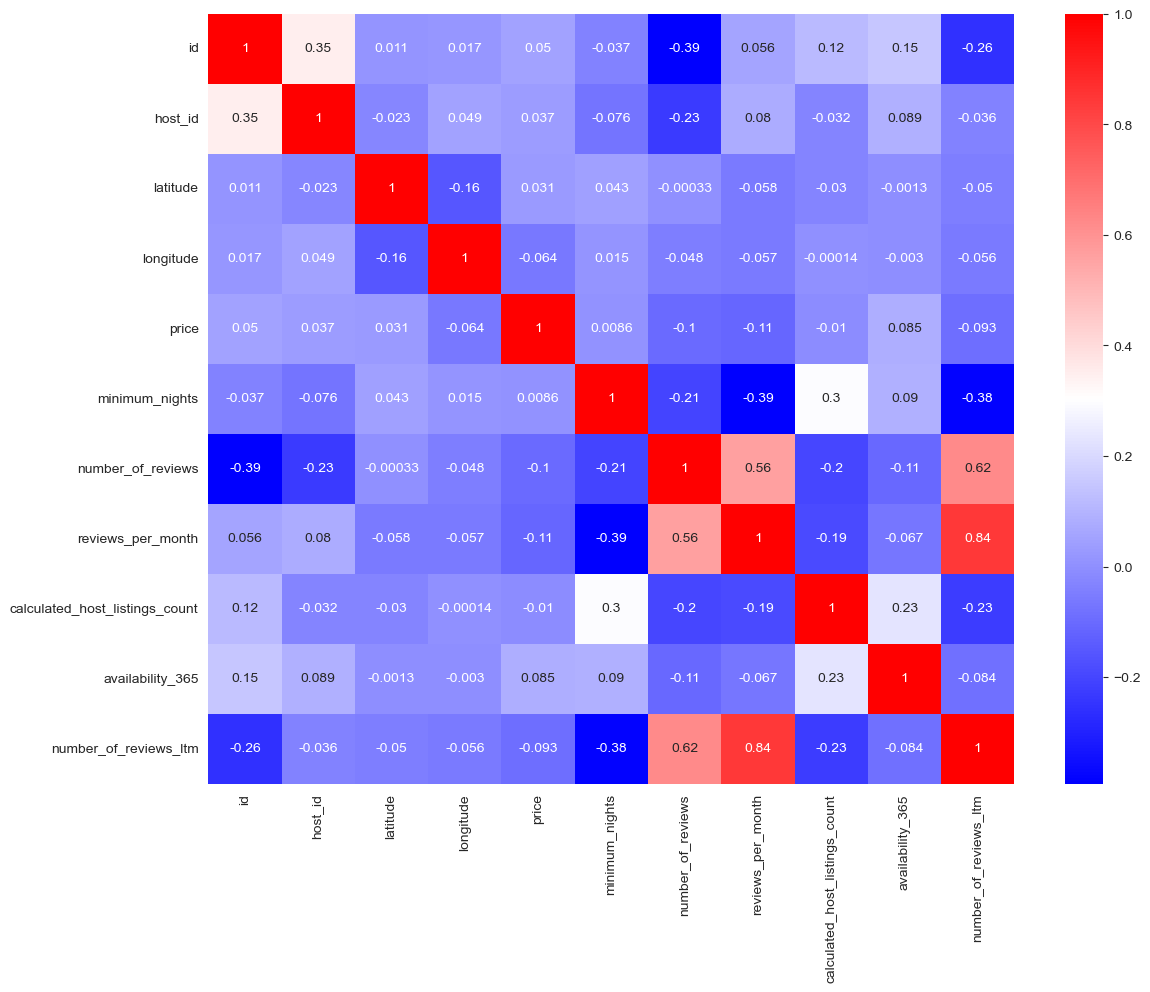

In [25]:
# Plot the heatmap for Seattle listings
plt.figure(figsize=(13, 10))
sns.heatmap(listings_Seattle.corr(), cmap='bwr', annot=True)

C:\Users\Somtochukwu Avah\AppData\Local\Temp\ipykernel_11604\207159396.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(listings_Boston.corr(), cmap='bwr', annot=True)


<Axes: >

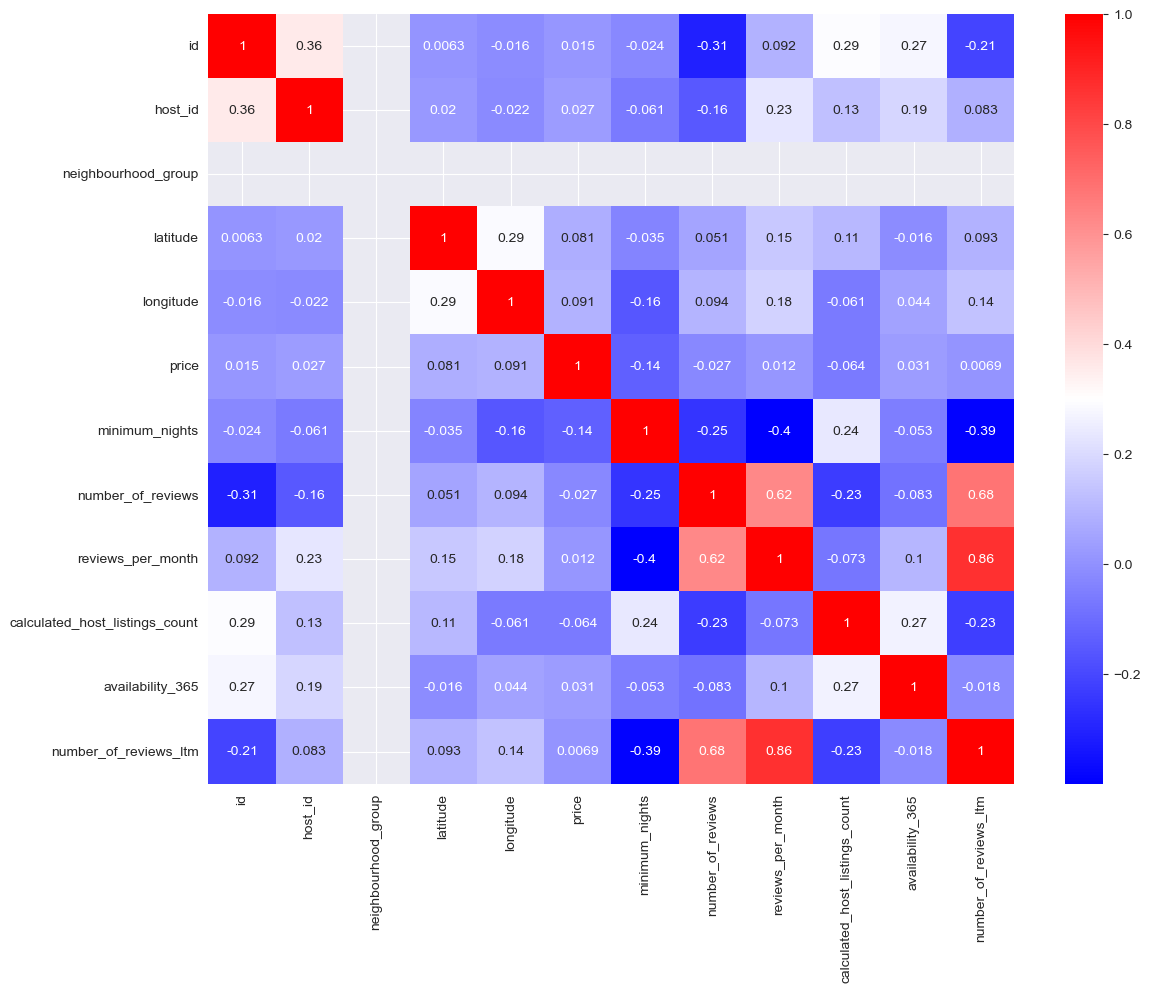

In [26]:
# Plot the heatmap for Boston listings
plt.figure(figsize=(13, 10))
sns.heatmap(listings_Boston.corr(), cmap='bwr', annot=True)

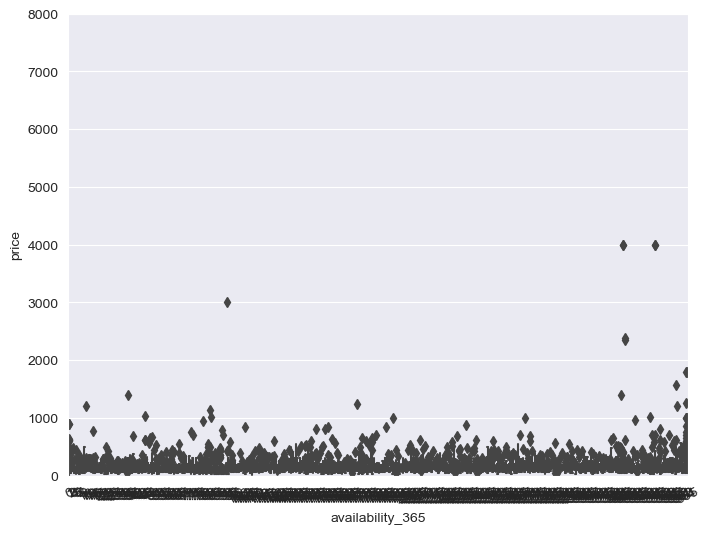

In [27]:
# Boxplot of price vs availability_365 for Seattle listings
var = 'availability_365'
data = pd.concat([listings_Seattle['price'], listings_Seattle[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000);
xt = plt.xticks(rotation=25)

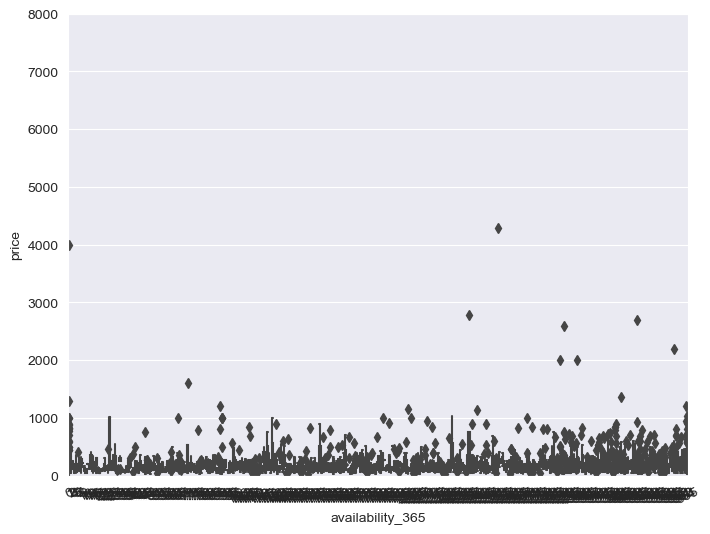

In [28]:
# Boxplot of price vs availability_365 for Boston listings
var = 'availability_365'
data = pd.concat([listings_Boston['price'], listings_Boston[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000);
xt = plt.xticks(rotation=25)

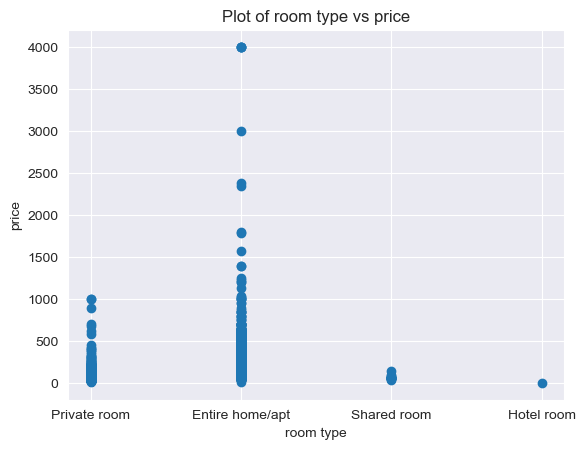

In [29]:
# Scatter plot of room type vs price for Seattle listings
plt.scatter(listings_Seattle.room_type, listings_Seattle.price)

plt.title('Plot of room type vs price') # Adding a title to the plot
plt.xlabel("room type") # Adding the label for the horizontal axis
plt.ylabel("price") # Adding the label for the vertical axis
plt.show()

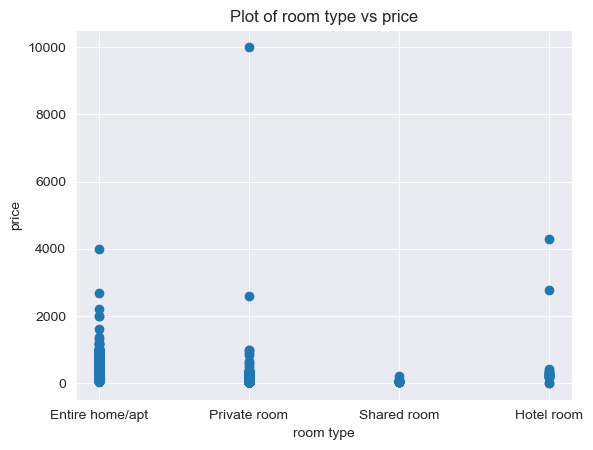

In [30]:
# Scatter plot of room type vs price for Boston listings
plt.scatter(listings_Boston.room_type, listings_Boston.price)

plt.title('Plot of room type vs price') # Adding a title to the plot
plt.xlabel("room type") # Adding the label for the horizontal axis
plt.ylabel("price") # Adding the label for the vertical axis
plt.show()

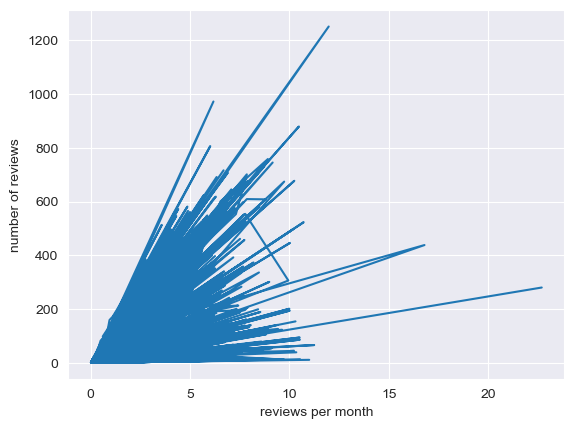

In [31]:
# Plot of reviews per month vs number of reviews for Seattle listings
plt.plot(listings_Seattle.reviews_per_month,listings_Seattle.number_of_reviews) # 2 arguments: X and Y points
plt.xlabel("reviews per month") # Adding the label for the horizontal axis
plt.ylabel("number of reviews")
plt.show()

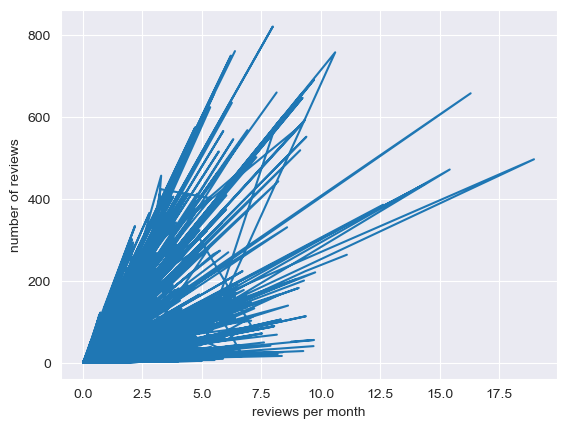

In [32]:
# Plot of reviews per month vs number of reviews for Boston listings
plt.plot(listings_Boston.reviews_per_month,listings_Boston.number_of_reviews) # 2 arguments: X and Y points
plt.xlabel("reviews per month") # Adding the label for the horizontal axis
plt.ylabel("number of reviews")
plt.show()

#### Analyze Data ####

**QUESTION 1: What features can strongly affect Airbnb rental price?**

In [33]:
# Correlation of Seattle listings
correlation = listings_Seattle.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price                             1.000000
availability_365                  0.084992
id                                0.050016
host_id                           0.036871
latitude                          0.030515
minimum_nights                    0.008561
calculated_host_listings_count   -0.010457
longitude                        -0.063671
number_of_reviews_ltm            -0.093458
number_of_reviews                -0.103815
reviews_per_month                -0.113618
Name: price, dtype: float64 



C:\Users\Somtochukwu Avah\AppData\Local\Temp\ipykernel_11604\828095999.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = listings_Seattle.corr()


In [34]:
# Correlation of Boston listings
correlation = listings_Boston.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price                             1.000000
longitude                         0.090658
latitude                          0.081329
availability_365                  0.030878
host_id                           0.027121
id                                0.014822
reviews_per_month                 0.011863
number_of_reviews_ltm             0.006948
number_of_reviews                -0.026665
calculated_host_listings_count   -0.064095
minimum_nights                   -0.135298
neighbourhood_group                    NaN
Name: price, dtype: float64 



C:\Users\Somtochukwu Avah\AppData\Local\Temp\ipykernel_11604\815252534.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = listings_Boston.corr()


In [35]:
# Return the first 5 rows of Seattle listings
listings_Seattle.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,879181,In Jimi Hendrix's neighborhood 3,287172,Laura,Central Area,Atlantic,47.60096,-122.30190,Private room,53,30,99,2022-12-16,0.80,2,247,4,STR-OPLI-19-002301
1,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99,30,159,2022-09-03,0.95,3,99,2,str-opli-19-002622
2,902609,Entire guest suite in West Seattle,3264544,Fabio,Delridge,Highland Park,47.52383,-122.35287,Entire home/apt,70,2,238,2023-03-21,1.95,5,206,27,STR-OPLI-19-002360
3,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,55,2,175,2023-01-15,1.14,9,356,20,STR-OPLI-19-003039
4,226536,Serene Room in Sunny Cottage near Discovery Park,209571,Cheryl,Magnolia,Lawton Park,47.66133,-122.40088,Private room,61,1,316,2022-12-12,2.28,1,209,53,STR-OPLI-19-000684


In [36]:
# Return the last 5 rows of Seattle listings
listings_Seattle.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
6371,743574186938554905,*Beautifully remodeled Ballard Bungalow*,44475671,Stephanie,Ballard,Loyal Heights,47.680776,-122.390584,Entire home/apt,263,30,0,NaN,NaN,1,7,0,NaN
6372,743578810848940797,1 bedroom in Ballard w/ outdoor patio,52448159,Kiera,Ballard,Loyal Heights,47.689810,-122.379060,Entire home/apt,79,1,18,2023-03-10,5.05,1,50,18,STR-OPLI-22-001898
6373,743583595153614537,Hideout Room in the Central District,484453762,Julia,Central Area,Mann,47.601920,-122.300590,Private room,36,1,11,2023-03-02,2.26,20,89,11,STR-OPLI-19-002825
6374,743600450516590869,New Private Apt-1 Bdrm w/Queen Bed in Capitol ...,1766221,Karina,Capitol Hill,Stevens,47.623950,-122.301550,Entire home/apt,119,1,11,2023-02-25,2.64,1,236,11,STR-OPLI-22-001817
6375,743615472351168189,Peaceful Retreat Room in the Central District,484453762,Julia,Central Area,Mann,47.601960,-122.298580,Private room,36,1,26,2023-02-28,5.17,20,88,26,STR-OPLI-19-002825


In [37]:
# Return the first 5 rows of Boston listings
listings_Boston.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,132,32,24,2022-09-05,0.26,1,87,2,NaN
1,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,NaN,Roxbury,42.32844,-71.09581,Entire home/apt,149,3,118,2022-12-05,0.69,10,21,8,Approved by the government
2,2021489,Spacious Updated Boston Room/Condo,10197317,Shannon,NaN,South Boston,42.33375,-71.04767,Private room,231,29,86,2022-08-31,1.02,5,342,1,STR-383155
3,2108738,Back Bay Studio,10750832,Tom,NaN,Back Bay,42.35040,-71.08891,Entire home/apt,70,91,34,2016-08-14,0.30,1,0,0,NaN
4,2126053,"Studio, w kitchenette, in owner's Beacon Hill ...",10844648,Janet,NaN,Beacon Hill,42.35771,-71.06978,Entire home/apt,165,29,117,2023-03-14,1.08,1,147,6,STR-395757


In [38]:
# Return the last 5 rows of Boston listings
listings_Boston.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3859,840898745853352647,"Cozy, Sunny Bedroom/Boston/UMASS",502371178,Emil,NaN,Dorchester,42.307301,-71.076004,Private room,45,1,0,NaN,NaN,12,359,0,Exempt: This listing is a unit that has contra...
3860,841300163917010243,Lake View Fabulous modern2Br 2Ba,163848078,Adam,NaN,Jamaica Plain,42.328629,-71.112177,Entire home/apt,318,6,1,2023-03-13,1.0,47,348,1,Str-072579
3861,841306752947174130,"Back Bay One Bedroom, Ready For Long Stays!",11363632,Ashley,NaN,Back Bay,42.354257,-71.078665,Entire home/apt,163,92,0,NaN,NaN,1,352,0,NaN
3862,841340391794964228,Residential home 5 bedrooms with free parking,504179464,Bill,NaN,Mattapan,42.275860,-71.072287,Entire home/apt,461,4,0,NaN,NaN,1,261,0,STR-517953
3863,842140331839890874,(140-1f) Cute & Cozy Back Bay Studio,331225367,Stone,NaN,Back Bay,42.354116,-71.074272,Entire home/apt,159,1,0,NaN,NaN,58,108,0,Exempt: This listing is a unit that has contra...


In [39]:
# Return the shape of Seattle listings
listings_Seattle.shape

(6376, 18)

In [40]:
# Return the shape of Boston listings
listings_Boston.shape

(3864, 18)

**SECTION 4: Data Modelling**

In [41]:
y_listings_Seattle = listings_Seattle[['price']] # target variable i.e price
X_listings_Seattle = listings_Seattle.drop(['price'], axis=1)

In [42]:
y_listings_Boston = listings_Boston[['price']] # target variable i.e price
X_listings_Boston = listings_Boston.drop(['price'], axis=1)

In [43]:
# Use MinMax algorithm for processing the numerical data for Seattle listings
scaler = MinMaxScaler()
numerical = ['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']
listings_Seattle[numerical] = scaler.fit_transform(listings_Seattle[numerical])

In [44]:
# Use MinMax algorithm for processing the numerical data for Boston listings
scaler = MinMaxScaler()
numerical = ['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']
listings_Boston[numerical] = scaler.fit_transform(listings_Boston[numerical])

In [45]:
X_listings_Seattle = X_listings_Seattle.apply(pd.to_numeric, errors='coerce')
y_listings_Seattle = y_listings_Seattle.apply(pd.to_numeric, errors='coerce')

In [46]:
X_listings_Boston = X_listings_Boston.apply(pd.to_numeric, errors='coerce')
y_listings_Boston = y_listings_Boston.apply(pd.to_numeric, errors='coerce')

In [47]:
X_listings_Seattle.fillna(0, inplace=True)
y_listings_Seattle.fillna(0, inplace=True)

In [48]:
X_listings_Boston.fillna(0, inplace=True)
y_listings_Boston.fillna(0, inplace=True)

In [49]:
# Compute with Linear Regression Algorithm
lr = LinearRegression()

#### Split Data ####

In [50]:
X_listings_Seattle_train,X_listings_Seattle_test,y_listings_Seattle_train,y_listings_Seattle_test=train_test_split(X_listings_Seattle,y_listings_Seattle,test_size=0.20,random_state=1)
clf_Seattle = LinearRegression().fit(X_listings_Seattle_train, y_listings_Seattle_train)

In [51]:
X_listings_Boston_train,X_listings_Boston_test,y_listings_Boston_train,y_listings_Boston_test=train_test_split(X_listings_Boston,y_listings_Boston,test_size=0.20,random_state=1)
clf_Boston = LinearRegression().fit(X_listings_Boston_train, y_listings_Boston_train)

In [52]:
listings_Seattle = listings_Seattle.apply(pd.to_numeric, errors='coerce')

In [53]:
listings_Boston = listings_Boston.apply(pd.to_numeric, errors='coerce')

In [54]:
listings_Seattle.fillna(0, inplace=True)

In [55]:
listings_Boston.fillna(0, inplace=True)

In [56]:
listings_Seattle_test = listings_Seattle[['price']]

In [57]:
listings_Boston_test = listings_Boston[['price']]

#### Splitted Data Evaluation ####

In [58]:
lr.fit(listings_Seattle, listings_Seattle_test)

LinearRegression()

In [59]:
lr.fit(listings_Boston, listings_Boston_test)

LinearRegression()

In [60]:
y_pred_Seattle=clf_Seattle.predict(X_listings_Seattle_test)

In [61]:
y_pred_Boston=clf_Boston.predict(X_listings_Boston_test)

**QUESTION 2: What features distinguishes Airbnb homes in Seattle from those in Boston?**

In [62]:
# print result of MSE for Seattle
print("MSE for Seattle: {}.".format(mean_squared_error(y_listings_Seattle_test, y_pred_Seattle)))

MSE for Seattle: 32411.157111434437.


In [63]:
# print result of MSE for Boston
print("MSE for Boston: {}.".format(mean_squared_error(y_listings_Boston_test, y_pred_Boston)))

MSE for Boston: 27715.105192599814.


In [64]:
# print result of RMSE for Seattle
print("RMSE for Seattle: {}.".format(np.sqrt(metrics.mean_squared_error(y_listings_Seattle_test, y_pred_Seattle))))

RMSE for Seattle: 180.0309893086033.


In [65]:
# print result of RMSE for Boston
print("RMSE for Boston: {}.".format(np.sqrt(metrics.mean_squared_error(y_listings_Boston_test, y_pred_Boston))))

RMSE for Boston: 166.47854273929664.


In [66]:
# print result of MAE for Seattle
print("MAE for Seattle: {}.".format(mean_absolute_error(y_listings_Seattle_test, y_pred_Seattle)))

MAE for Seattle: 77.82932235814266.


In [67]:
# print result of MAE for Boston
print("MAE for Boston: {}.".format(mean_absolute_error(y_listings_Boston_test, y_pred_Boston)))

MAE for Boston: 107.24495793540488.


In [68]:
y_pred_clf_Seattle_train=clf_Seattle.predict(X_listings_Seattle_train)
print("RMSE for y_pred_clf_Seattle_train : {}.".format(np.sqrt(metrics.mean_squared_error(y_listings_Seattle_test, y_pred_Seattle))))

RMSE for y_pred_clf_Seattle_train : 180.0309893086033.


In [69]:
y_pred_clf_Boston_train=clf_Boston.predict(X_listings_Boston_train)
print("RMSE for y_pred_clf_Boston_train : {}.".format((np.sqrt(metrics.mean_squared_error(y_listings_Boston_test, y_pred_Boston)))))

RMSE for y_pred_clf_Boston_train : 166.47854273929664.


In [70]:
print("r2_score for Seattle: {}.".format((metrics.r2_score(y_listings_Seattle_test, y_pred_Seattle))))

r2_score for Seattle: 0.01776319415674532.


In [71]:
print("r2_score for Boston: {}.".format((metrics.r2_score(y_listings_Boston_test, y_pred_Boston))))

r2_score for Boston: 0.015461375955910461.


In [72]:
# compute with statsmodels for Seattle, by adding intercept manually
import statsmodels.api as sm
X1_listings_Seattle = sm.add_constant(X_listings_Seattle)
result = sm.OLS(y_listings_Seattle, X1_listings_Seattle).fit()
print("statsmodels result for Seattle: {}.".format((result.rsquared_adj)))

statsmodels result for Seattle: -0.4558574367266297.


In [73]:
# compute with statsmodels for Boston, by adding intercept manually
import statsmodels.api as sm
X1_listings_Boston = sm.add_constant(X_listings_Boston)
result = sm.OLS(y_listings_Boston, X1_listings_Boston).fit()
print("statsmodels result for Boston: {}.".format((result.rsquared_adj)))

statsmodels result for Boston: -0.23484815005170656.


In [74]:
# Compute with RandomForestRegressor Algorithm
reg=RandomForestRegressor(max_depth=25,n_estimators=700,random_state=0)

In [75]:
# Fit the RandomForestRegressor Algorithm for Seattle listings
reg.fit(X_listings_Seattle_train,y_listings_Seattle_train)
y_pred1_Seattle=reg.predict(X_listings_Seattle_test)

C:\Users\Somtochukwu Avah\AppData\Local\Temp\ipykernel_11604\158909659.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_listings_Seattle_train,y_listings_Seattle_train)


In [76]:
# Fit the RandomForestRegressor Algorithm for Boston listings
reg.fit(X_listings_Boston_train,y_listings_Boston_train)
y_pred1_Boston=reg.predict(X_listings_Boston_test)

C:\Users\Somtochukwu Avah\AppData\Local\Temp\ipykernel_11604\3505975828.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_listings_Boston_train,y_listings_Boston_train)


In [77]:
# print result of MAE for Seattle
print("MAE for y_pred1_Seattle: {}.".format((metrics.mean_absolute_error(y_listings_Seattle_test, y_pred1_Seattle))))

MAE for y_pred1_Seattle: 66.89146751407824.


In [78]:
#print result of MSE for Seattle
print("MSE for y_pred1_Seattle: {}.".format((metrics.mean_squared_error(y_listings_Seattle_test, y_pred1_Seattle))))

MSE for y_pred1_Seattle: 22435.218165766884.


In [79]:
#print result of RMSE for Seattle
print("RMSE for y_pred1_Seattle: {}.".format((np.sqrt(metrics.mean_squared_error(y_listings_Seattle_test, y_pred1_Seattle)))))

RMSE for y_pred1_Seattle: 149.78390489557577.


In [80]:
# print result of MAE for Boston
print("MAE for y_pred1_Boston: {}.".format((metrics.mean_absolute_error(y_listings_Boston_test, y_pred1_Boston))))

MAE for y_pred1_Boston: 74.1509706523806.


In [81]:
#print result of MSE for Boston
print("MSE for y_pred1_Boston: {}.".format((metrics.mean_squared_error(y_listings_Boston_test, y_pred1_Boston))))

MSE for y_pred1_Boston: 23550.440434775668.


In [82]:
#print result of RMSE for Boston
print("RMSE for y_pred1_Boston: {}.".format((np.sqrt(metrics.mean_squared_error(y_listings_Boston_test, y_pred1_Boston)))))

RMSE for y_pred1_Boston: 153.46152753956176.


In [83]:
y_pred_train_Seattle=reg.predict(X_listings_Seattle_train)

In [84]:
y_pred_train_Boston=reg.predict(X_listings_Boston_train)

In [85]:
print("MSE for y_pred_train_Seattle: {}.".format(np.sqrt(metrics.mean_squared_error(y_listings_Seattle_test, y_pred_Seattle))))

MSE for y_pred_train_Seattle: 180.0309893086033.


In [86]:
print("MSE for y_pred_train_Boston: {}.".format(np.sqrt(metrics.mean_squared_error(y_listings_Boston_test, y_pred_Boston))))

MSE for y_pred_train_Boston: 166.47854273929664.


In [87]:
# Compute with SVM classifier and RBF Kernel
best_svr = SVR(kernel='rbf')
best_svr.fit(X_listings_Seattle_train, y_listings_Seattle_train)
y_pred_cross_Seattle=best_svr.predict(X_listings_Seattle_test)
print("MSE for y_pred_train_Seattle: {}.".format(np.sqrt(metrics.mean_squared_error(y_listings_Seattle_test, y_pred_cross_Seattle))))

C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE for y_pred_train_Seattle: 184.65137135819793.


In [88]:
# Compute with SVM classifier and RBF Kernel
best_svr = SVR(kernel='rbf')
best_svr.fit(X_listings_Boston_train, y_listings_Boston_train)
y_pred_cross_Boston=best_svr.predict(X_listings_Boston_test)
print("MSE for y_pred_train_Seattle: {}.".format(np.sqrt(metrics.mean_squared_error(y_listings_Boston_test, y_pred_cross_Boston))))

C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE for y_pred_train_Seattle: 171.59957886267756.


In [89]:
print("r2_score for Seattle: {}.".format(metrics.r2_score(y_listings_Seattle_test, y_pred1_Seattle)))

r2_score for Seattle: 0.32008916084748384.


In [90]:
print("r2_score for Boston: {}.".format(metrics.r2_score(y_listings_Boston_test, y_pred1_Boston)))

r2_score for Boston: 0.16340500748027897.


In [91]:
# Compute scores with SVM classifier and RBF Kernel for Seattle listings
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=20, random_state=42, shuffle=True)
for train_index_Seattle, test_index_Seattle in cv.split(X_listings_Seattle):
    print("Train Index Seattle: ", train_index_Seattle, "\n")
print("Test Index Seattle: ", test_index_Seattle)

X_listings_Seattle_train, X_listings_Seattle_test, y_listings_Seattle_train, y_listings_Seattle_test = X_listings_Seattle[train_index_Seattle], X_listings_Seattle[test_index_Seattle], y_listings_Seattle[train_index_Seattle], y[test_index_Seattle]
best_svr.fit(X_listings_Seattle_train, y_listings_Seattle_train)
scores.append(best_svr.score(X_listings_Seattle_test, y_listings_Seattle_test))

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6372 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6372 6373 6374] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   1    2    3 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6372 6373 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    2    3 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    3 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ..

KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n            ...\n            6366, 6367, 6368, 6369, 6370, 6371, 6372, 6373, 6374, 6375],\n           dtype='int64', length=6058)] are in the [columns]"

In [92]:
# Compute scores with SVM classifier and RBF Kernel for Boston listings
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=20, random_state=42, shuffle=True)
for train_index_Boston, test_index_Boston in cv.split(X_listings_Boston):
    print("Train Index Boston: ", train_index_Seattle, "\n")
print("Test Index Boston: ", test_index_Boston)

X_listings_Boston_train, X_listings_Boston_test, y_listings_Boston_train, y_listings_Boston_test = X_listings_Boston[train_index_Boston], X_listings_Boston[test_index_Boston], y_listings_Boston[train_index_Boston], y[test_index_Boston]
best_svr.fit(X_listings_Boston_train, y_listings_Boston_train)
scores.append(best_svr.score(X_listings_Boston_test, y_listings_Boston_test))

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375]

KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n            ...\n            3854, 3855, 3856, 3857, 3858, 3859, 3860, 3861, 3862, 3863],\n           dtype='int64', length=3671)] are in the [columns]"

In [94]:
# Fit the best SVM classifier for Seattle listings
best_svr.fit(X_listings_Seattle_train, y_listings_Seattle_train)
scores.append(best_svr.score(X_listings_Seattle_test, y_listings_Seattle_test))

C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
# Fit the best SVM classifier for Boston listings
best_svr.fit(X_listings_Boston_train, y_listings_Boston_train)
scores.append(best_svr.score(X_listings_Boston_test, y_listings_Boston_test))

C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
# Compute the Cross-Validation score for Seattle listings
cross_val_score(best_svr, X_listings_Seattle, y_listings_Seattle, cv=12)

C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

array([-0.0279765 , -0.05155866, -0.08217129, -0.03240543, -0.08741028,
       -0.05291687, -0.09802789, -0.05232918, -0.02882456, -0.03646392,
       -0.02530166, -0.01506655])

In [97]:
# Compute the Cross-Validation score for Boston listings
cross_val_score(best_svr, X_listings_Boston, y_listings_Boston, cv=12)

C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

array([-0.00292053, -0.00350624, -0.00943518, -0.0170193 , -0.0071552 ,
       -0.31721465, -0.11803074, -0.1513483 , -0.11578806, -0.04782284,
       -0.1555281 , -0.001465  ])

In [98]:
# Compute the Cross-Validation prediction for Seattle listings
cross_val_predict(best_svr, X_listings_Seattle, y_listings_Seattle, cv=8)

C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

array([127.90029413, 127.90029413, 127.90029413, ..., 144.03465121,
       144.03400121, 144.03342192])

In [99]:
# Compute the Cross-Validation prediction for Boston listings
cross_val_predict(best_svr, X_listings_Boston, y_listings_Boston, cv=8)

C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Somtochukwu Avah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

array([150.10000015, 150.10000015, 150.10000015, ..., 169.17629162,
       169.17610215, 169.17154381])

#### Deployment ####

In [100]:
# Load the test data
listings_NYC=pd.read_csv('listings_NYC.csv')

In [101]:
# Return the first 5 rows of test data
listings_NYC.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [102]:
# Return the shape of test data
listings_NYC.shape

(48895, 16)

In [103]:
# Calculate the sum of the categorical values
listings_NYC.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [104]:
# Drop neighbourhood_group column and other irrevalant features
listings_NYC.drop(['neighbourhood_group', 'id', 'name', 'host_id', 'host_name'], axis=1,inplace=True)

In [105]:
# Return the shape of test data after dropping irrelevant features
listings_NYC.shape

(48895, 11)

**QUESTION 3: How to differentiate the reviews based on price?**

In [106]:
listings_NYC.drop('last_review',axis=1,inplace=True)

In [107]:
listings_NYC['reviews_per_month'].fillna(listings_NYC['reviews_per_month'].mean(),inplace=True)

In [108]:
# label_encoder object understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
listings_NYC['room_type']= label_encoder.fit_transform(listings_NYC['room_type'])

listings_NYC['neighbourhood']= label_encoder.fit_transform(listings_NYC['neighbourhood'])

In [ ]:
listings_NYC_test = listings_NYC[['price']]
best_svr.fit(listings_NYC, listings_NYC_test)
price=best_svr.predict(listings_NYC)

In [ ]:
d1 = {'price':price[:,]}
df2 = pd.DataFrame(d1,)
df2.shape

(48895, 1)

In [ ]:
df2.head()

,price
0,148.293876
1,226.562884
2,149.690895
3,93.909330
4,79.251394


In [113]:
airbnb_csv = df2.to_csv('C:/Users/Somtochukwu Avah/Documents/Udacity-Data-Scientist-Nanodegree/Seattle_Boston_NYC_airbnb_csv',index=False)